### Загрузим основные пакеты

In [32]:
import scipy as sp
import scipy.linalg as spla
import scipy.optimize as spopt
import scipy.stats as spst
import statsmodels.tools.tools as tools



import numpy as np
import numpy.linalg as npla

import statsmodels as sm
import statsmodels.api as sma
from statsmodels.nonparametric.smoothers_lowess import lowess


smfOLS = sma.regression.linear_model.OLS.from_formula
smfLGT = sm.discrete.discrete_model.Logit.from_formula

import seaborn as sb
import pandas as pd

import matplotlib.pyplot as plt



In [2]:
# matplotlib image size and resolution
mpl_options = {"figsize":(8,8), "dpi":100}
sb.set(rc={'figure.figsize':(12,8)})

### Regression discontinuity

In [88]:
def func(x):
    if x < 1:
        return .2*x
    if x >= 1:
        return .7*x - .25

In [89]:
x = np.random.uniform(0,2, 1000)
y = np.array([func(i) for i in x]) + np.random.uniform(0,.2,1000)

<AxesSubplot:>

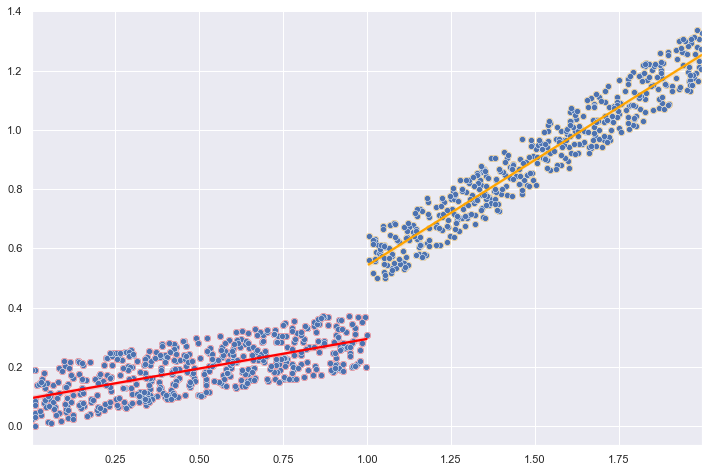

In [25]:
sb.regplot(x=xleft, y=yleft, color = 'red')
sb.regplot(x=xright, y=yright, color = 'orange')
sb.scatterplot(x=x, y=y)

### Assignment 1 (2 points). Write a function that computes the size of discontinuity in the OLS context with the data above.

In [91]:
def rd1(x, y, loc = 0):
    data = np.vstack((x, y))
    df = pd.DataFrame(data.T, columns = (['x', 'y']))
    xleft = tools.add_constant(df[df.x<1].x.values)
    xright = tools.add_constant(df[df.x>=1].x.values)
    yleft = df[df.x<1].y.values
    yright = df[df.x>=1].y.values
    betas_l =  spla.inv(xleft.T@xleft)@(xleft.T@yleft)
    betas_r =  spla.inv(xright.T@xright)@(xright.T@yright)
    betas_diff = betas_r - betas_l
    value_diff = betas_diff[0] + betas_diff[1]
    return value_diff, betas_diff
rd1(x, y)

(0.24940543455152664, array([-0.2600221 ,  0.50942753]))

### But what if it is nonlinear and we want to use loess or lowess? The kernel will crash at the boundary, we need data smoothly continue "to the other side"

In [23]:
x = np.random.uniform(0,2, 1000)

In [24]:
def func(x):
    if x < 1:
        return np.sin(6*x)+3
    if x >= 1:
        return np.cos(6*x)+4

In [25]:
y = np.array([func(i) for i in x]) + np.random.uniform(0,1,1000)

<AxesSubplot:>

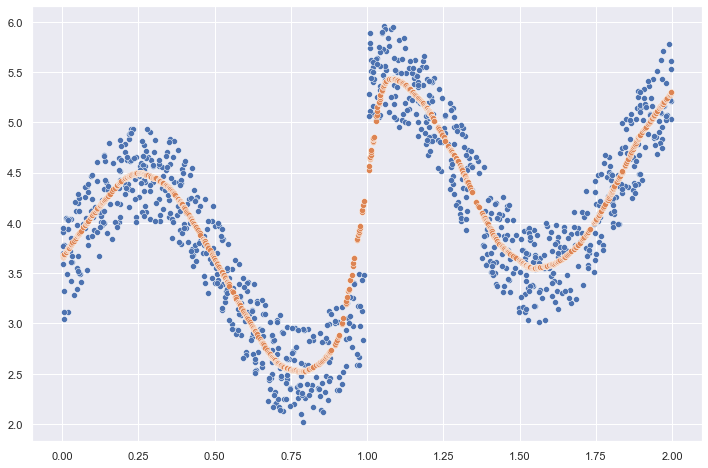

In [51]:
sb.scatterplot(x=x, y=y)

sb.scatterplot(x= low[:,0], y = low[:, 1])

### Reflection method: mirror the data to the other side of the threshold, and use it to get the value at the boundary properly. Otherwise the estimate will fall towards zero

### Assignment 2 (3 points).Write a function that computes the size of discontinuity in the  context of local-CONSTANT regression with the data above, with boundary correction. Plot the fit. You can use any intermediate packages.

In [79]:
def rd2(x, y, loc = 1):
    data = np.vstack((x, y))
    df = pd.DataFrame(data.T, columns = (['x', 'y']))

    
    xleft =  df[df.x<loc].x.values
    xright = df[df.x>=loc].x.values


    yleft = df[df.x<loc].y.values
    yright = df[df.x>=loc].y.values

    
    lowess_left  =  lowess(yleft, xleft, frac = .1)
    lowess_right =  lowess(yright, xright, frac = .1)

    lowess_diff = lowess_right[0, :] - lowess_left[-1, :]
    value_diff = lowess_diff[0] + lowess_diff[1]
    
    return value_diff, lowess_diff
rd2(x, y)

(2.2594125780094445, array([0.01554876, 2.24386381]))